In [2]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

os.chdir('D:\Some Python\Reporte SEPTIEMBRE SJ JERSEY')

In [3]:
fanp = pd.read_csv('FAN PAGE SJ JERSEY.csv')
fanp.drop (labels = 0, inplace = True)
fanp.drop(fanp.iloc[:,2:1586],axis = 1, inplace = True)
fanp

,Fecha,Lifetime Total Likes
1,2020-07-01,2602
2,2020-07-02,2612
3,2020-07-03,2622
4,2020-07-04,2627
5,2020-07-05,2629
...,...,...
88,2020-09-26,3066
89,2020-09-27,3072
90,2020-09-28,3074
91,2020-09-29,3077


In [4]:
fanp['Fecha'] = pd.to_datetime(fanp['Fecha'])
fanp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 1 to 92
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Fecha                 92 non-null     datetime64[ns]
 1   Lifetime Total Likes  92 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 2.2+ KB


In [5]:
fanp.iloc[-1,1]

'3087'

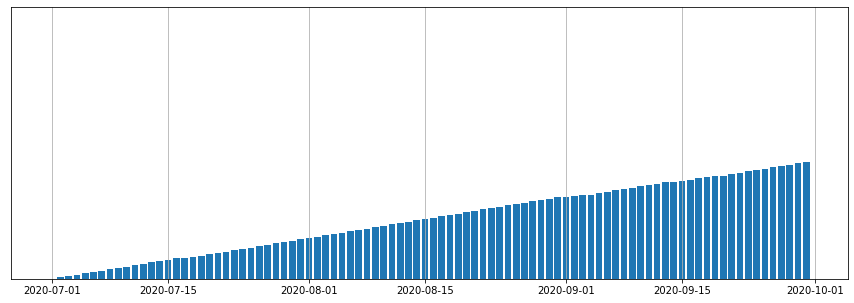

In [13]:
plt.figure(figsize = (15,5))

plt.bar (fanp['Fecha'], fanp['Lifetime Total Likes'], width = 0.8)
plt.yticks(np.arange(int(fanp.iloc[0,1])-200,int(fanp.iloc[-1,1])+200,200))
plt.ylim(0, 200)
plt.grid (True)
plt.show()


# INDIVIDUAL POST REACH (ORGANIC & PAID) 

In [7]:
post = pd.read_csv('POST REPORT SJ JERSEY.csv')
post.drop (labels = 0, inplace = True)
post.drop(post.iloc[:,14:52],axis = 1, inplace = True)

In [8]:
post = post.astype({'Lifetime Post Total Reach':int, 
                    'Lifetime Post organic reach':int,
                    'Lifetime Post Paid Reach':int,
                    'Lifetime Post Total Impressions':int,
                    'Lifetime Post Organic Impressions':int,
                    'Lifetime Post Paid Impressions':int
                   })
post['Publicado'] = pd.to_datetime(post['Publicado'])
post['Month'] = post['Publicado'].dt.month

In [9]:
post.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 1 to 64
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Identificador de la publicación    64 non-null     object        
 1   Enlace permanente                  64 non-null     object        
 2   Mensaje de la publicación          64 non-null     object        
 3   Tipo                               64 non-null     object        
 4   Países                             0 non-null      float64       
 5   Idiomas                            0 non-null      float64       
 6   Publicado                          64 non-null     datetime64[ns]
 7   Segmentación del público           64 non-null     object        
 8   Lifetime Post Total Reach          64 non-null     int32         
 9   Lifetime Post organic reach        64 non-null     int32         
 10  Lifetime Post Paid Reach           64 no

Pending task, how to visualize only one month, just september.
with no blank spaces. Just in the dates theres info, no need to put 0, in the dates were no post was uploaded

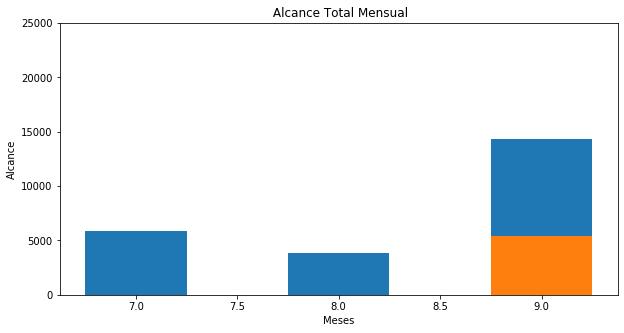

In [21]:
months = {1:'JAN', 2:'FEB',3:'MAR', 4:'APR', 5:'MAY', 6: 'JUN',
          7:'JUL', 8:'AUG',9:'SEP', 10:'OCT', 11:'NOV', 12: 'DEC'}
plt.figure(figsize = (10,5))

#plt.bar  ([months[x] for x in post['Month']],post['Lifetime Post Total Reach'])
plt.bar (post['Month'], post['Lifetime Post organic reach'], width = 0.5)
plt.bar (post['Month'], post['Lifetime Post Paid Reach'], width = 0.5)
plt.ylim(0,25000)

plt.title ( ' Alcance Total Mensual')
plt.ylabel('Alcance')
plt.xlabel('Meses')
plt.show()


In [11]:
post['Lifetime Post organic reach'].sum(), post['Lifetime Post Paid Reach'].sum()

(108831, 9610)